In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import mean_squared_error , r2_score
from sklearn import datasets


import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv('car data.csv')

In [107]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [108]:
df.shape

(301, 9)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [110]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [111]:
df.Fuel_Type.value_counts()
df.Seller_Type.value_counts()
df.Transmission.value_counts()


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [112]:
df.replace({'Fuel_Type':{'Petrol':0 , 'Diesel':1 , 'CNG':2}} , inplace=True)

df.replace({'Seller_Type':{'Dealer':0 , 'Individual':1 }} , inplace=True)

df.replace({'Transmission' : {'Manual' : 0 , 'Automatic':1}} , inplace=True)

In [113]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [114]:
X = df.drop(['Car_Name' , 'Selling_Price'] , axis=1)
Y = df['Selling_Price']
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.1 ,random_state=2)

In [116]:
from sklearn.linear_model import LinearRegression
ling_reg_model = LinearRegression()

In [117]:
ling_reg_model.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
training_pred = ling_reg_model.predict(X_train)

In [119]:
from sklearn.metrics import  r2_score
from sklearn import metrics

error_score = metrics.r2_score(y_train , training_pred)
print('R squared Error : ' , error_score) 

R squared Error :  0.8799451660493708


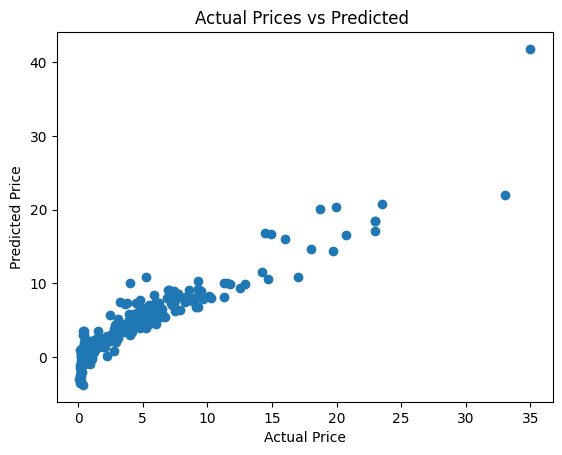

In [120]:
plt.scatter(x = y_train , y = training_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted ')
plt.show()

In [121]:
test_pred = ling_reg_model.predict(X_test)

In [122]:
error_score = metrics.r2_score(y_test , test_pred)
print('R squared Error : ' , error_score)

R squared Error :  0.8365766715026374


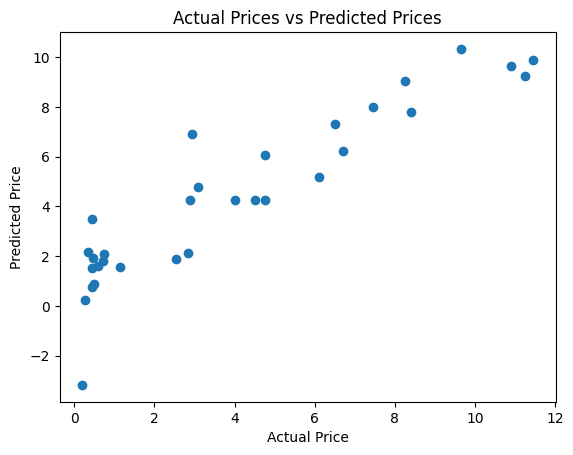

In [123]:
plt.scatter(x = y_test , y = test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [124]:
from sklearn.linear_model import Lasso
lass_reg_model = Lasso()

In [125]:
lass_reg_model.fit(X_train , y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [126]:
training_pred = lass_reg_model.predict(X_train)

In [127]:
error_score = metrics.r2_score(y_train , training_pred)
print('R Squared Error : ' , error_score)

R Squared Error :  0.8427856123435794


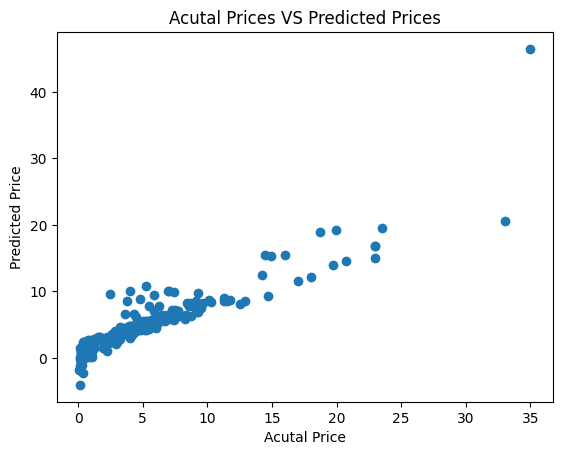

In [128]:
plt.scatter(x = y_train , y = training_pred)
plt.xlabel('Acutal Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Prices VS Predicted Prices')
plt.show()

In [129]:
test_pred = lass_reg_model.predict(X_test)

In [130]:
error_score = metrics.r2_score(y_test , test_pred)
print('R square Error : '  , error_score)

R square Error :  0.8709167941173195


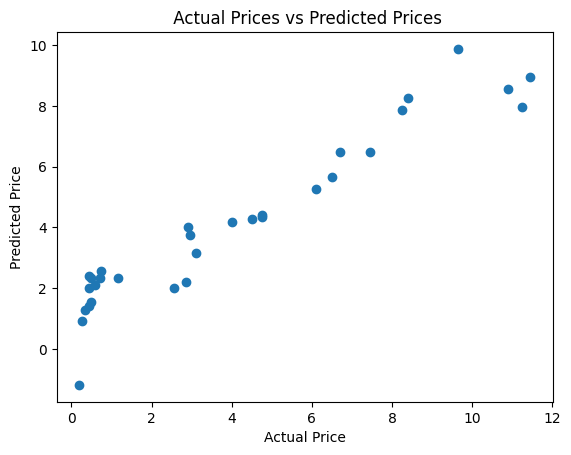

In [131]:
plt.scatter(y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()